### Unsupervised Classification

In [18]:
import os

import rasterio as rio
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [19]:
images_dir = r'.\images\cropped'

band_paths = [os.path.join(images_dir, item) for item in os.listdir(images_dir) if item.endswith('.TIF')]


# read the bands
bands = []

for file in band_paths:
    with rio.open(file) as src:
        band = src.read(1)

        bands.append(band)
bands

# stack everything into a 3d array (rows, columns, number of bands)
stacked_bands = np.dstack(bands)

n_rows, n_cols, n_bands = stacked_bands.shape

# Reshape to a 2D array (pixels, number of bands)
reshaped_bands = stacked_bands.reshape(-1, n_bands)

reshaped_bands.shape

(135048, 7)

### Apply K-Means Clustering

In [20]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(reshaped_bands)

classified = kmeans.labels_

#reshape to the original dimensions (rows, columns)
classified_image = classified.reshape(n_rows, n_cols)

classified_image



array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 1, 1, 2],
       [2, 2, 2, ..., 1, 1, 2],
       [2, 2, 2, ..., 2, 2, 2]])

### Saving classified rasters

In [21]:
band1 = r"\Users\Owner\Desktop\Desktop\12_Days_Geopython_Training\Day 11\images\rasters\Band1.TIF"

with rio.open(band1) as src:
    meta = src.meta

meta

# save the image

with rio.open('./classified2.TIF', 'w', **meta) as dst:
    dst.write(classified_image, 1)

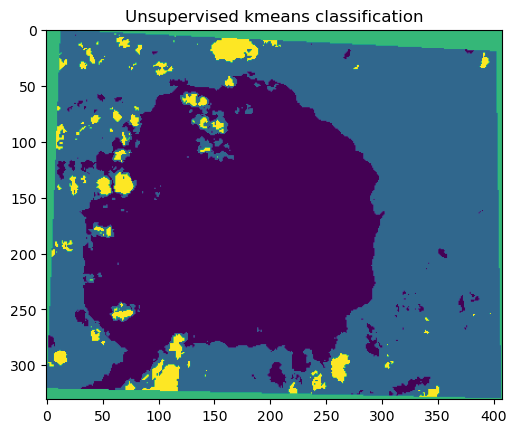

In [22]:
# Visualize classified raster

plt.imshow(classified_image)
plt.title("Unsupervised kmeans classification")
plt.show()